In [3]:
import pandas as pd

# Load the dataset
data_path = r"C:\Users\shash\NPI_extractor\dummy_npi_data.xlsx"
xls = pd.ExcelFile(data_path)

# Load the relevant sheet
df = pd.read_excel(xls)

# Convert timestamps to datetime format
df['Login Time'] = pd.to_datetime(df['Login Time'], errors='coerce')
df['Logout Time'] = pd.to_datetime(df['Logout Time'])

# Extract useful time features
df['Login Hour'] = df['Login Time'].dt.hour  # Extract hour of login time
df['Weekday'] = df['Login Time'].dt.weekday  # Extract day of the week (0 = Monday, 6 = Sunday)
df['Session Length'] = df['Usage Time (mins)']  # Renaming for clarity

# Convert categorical variables into dummy/label encoding
df = pd.get_dummies(df, columns=['State', 'Region', 'Speciality'], drop_first=True)

# Show first few rows to confirm
print(df.head())


          NPI          Login Time         Logout Time  Usage Time (mins)  \
0  1000000000 2025-03-08 06:09:00 2025-03-08 06:28:00                 19   
1  1000000001 2025-03-08 12:28:00 2025-03-08 13:10:00                 42   
2  1000000002 2025-03-08 15:11:00 2025-03-08 15:37:00                 26   
3  1000000003 2025-03-08 14:17:00 2025-03-08 15:36:00                 79   
4  1000000004 2025-03-08 15:59:00 2025-03-08 17:37:00                 98   

   Count of Survey Attempts  Login Hour  Weekday  Session Length  State_FL  \
0                         3           6        5              19         0   
1                         5          12        5              42         0   
2                         8          15        5              26         0   
3                         9          14        5              79         0   
4                         0          15        5              98         0   

   State_GA  ...  State_TX  Region_Northeast  Region_South  Region_West  \

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define features and target variable
X = df.drop(columns=['NPI', 'Login Time', 'Logout Time', 'Count of Survey Attempts'])  # Features
y = (df['Count of Survey Attempts'] > 0).astype(int)  # Target: 1 if survey attempted, else 0

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')


Model Accuracy: 0.89


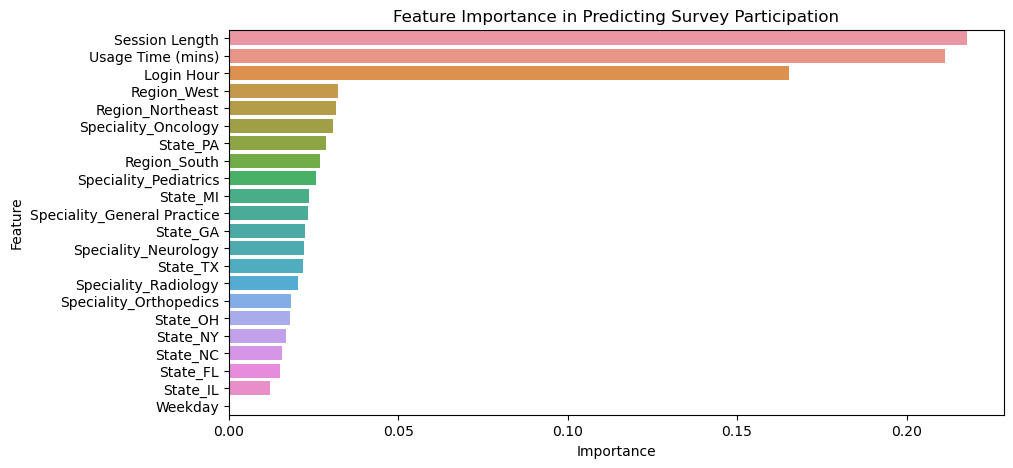

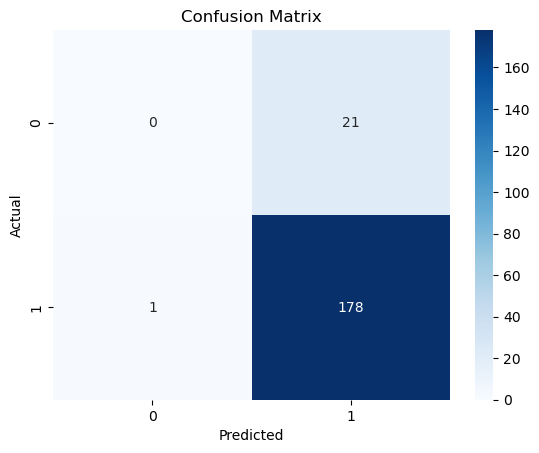

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.89      0.99      0.94       179

    accuracy                           0.89       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.80      0.89      0.84       200



In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Feature importance
importances = model.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feat_imp_df['Importance'], y=feat_imp_df['Feature'])
plt.title("Feature Importance in Predicting Survey Participation")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))


In [7]:
import pickle

# Save the trained model
model_path = "npi_model.pkl"
with open(model_path, "wb") as file:
    pickle.dump(model, file)

print(f"Model saved as {model_path}")

Model saved as npi_model.pkl


In [11]:
import joblib

# Save the trained model
model_path = "npi_model.joblib"
joblib.dump(model, model_path)

print(f"Model saved as {model_path}")


Model saved as npi_model.joblib


In [12]:
import sklearn
print(sklearn.__version__)

1.2.1


In [13]:
import sklearn
print(sklearn.__version__)

1.2.1


In [14]:
pip install -U scikit-learn

     ---------------------------------------- 11.1/11.1 MB 1.8 MB/s eta 0:00:00
     -------------------------------------- 301.8/301.8 kB 1.7 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1
Note: you may need to restart the kernel to use updated packages.


In [1]:
import sklearn
print(sklearn.__version__)

1.6.1
